In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from subprocess import Popen, PIPE, call


In [12]:
path_sun = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/sun_all/'
path_mrcv = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mrcv_all/'
path_mites = '/home/juan/Desktop/juan/bio/mirna_mite/data/tracker.gff3'

In [ ]:
#SUN DATA

Sun clusters: 157492
Sun miRNA: 154


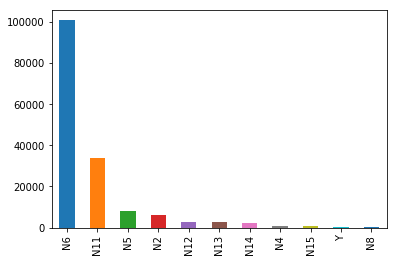

In [18]:
df_sun = pd.read_csv(path_sun + 'Results.txt', sep='\t')
df_sun.Name = 'sun_' + df_sun.Name.astype(str)
print('Sun clusters: ' + str(len(df_sun.index)))
df_sun.MIRNA.value_counts().plot('bar')
df_sun_m = df_sun[df_sun.MIRNA == 'Y']
print('Sun miRNA: ' + str(len(df_sun_m.index)))


In [19]:
#MRCV data

MRCV clusters: 38532
MRCV miRNA: 135


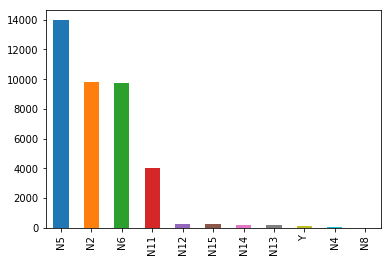

In [20]:
df_mrcv = pd.read_csv(path_mrcv + 'Results.txt', sep='\t')
df_mrcv.Name = 'mrcv_' + df_mrcv.Name.astype(str)
print('MRCV clusters: ' + str(len(df_mrcv.index)))
df_mrcv.MIRNA.value_counts().plot('bar')
df_mrcv_m = df_mrcv[df_mrcv.MIRNA == 'Y']
print('MRCV miRNA: ' + str(len(df_mrcv_m.index)))


In [21]:
#MITEs data

In [22]:
df_mites = pd.read_csv(path_mites, sep='\t')
df_mites.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('MITEs: ' + str(len(df_mites.index)))


MITEs: 1211339


In [23]:
#separate MITEs by chromosome
df_anns = {}
for chromosome in df_mites.seqname.unique():
    df_anns[chromosome] = df_mites[df_mites.seqname == chromosome]


In [44]:
df_all = pd.concat([df_sun_m, df_mrcv_m])
total_mirna = len(df_all.index)
print('Total miRNA mrcv + sun: ' + str(total_mirna))

Total miRNA mrcv + sun: 289


In [45]:
df_all['seqname'] = df_all['#Locus'].str.split(':').str[0]
df_all['position'] = df_all['#Locus'].str.split(':').str[1]
df_all['start'] = df_all.position.str.split('-').str[0].astype(int)
df_all['end'] = df_all.position.str.split('-').str[1].astype(int)

In [46]:
df_all.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Long,20,21,22,23,24,seqname,position,start,end
2788,1A:309399491-309399581,sun_Cluster_2789,91,459,3.635,4,0.007,-,ACGGCAUAGAGGCACUGCAAA,196,...,0,94,298,26,0,5,1A,309399491-309399581,309399491,309399581
4364,1A:492271831-492271941,sun_Cluster_4365,111,441,3.492,2,1.000,+,GAGGAGGAGGAGCAGGACAAG,336,...,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941


In [50]:
df_all.columns

Index(['#Locus', 'Name', 'Length', 'Reads', 'RPM', 'UniqueReads', 'FracTop',
       'Strand', 'MajorRNA', 'MajorRNAReads', 'Complexity', 'DicerCall',
       'MIRNA', 'PhaseScore', 'Short', 'Long', '20', '21', '22', '23', '24',
       'seqname', 'position', 'start', 'end'],
      dtype='object')

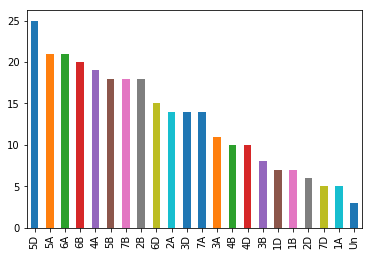

In [48]:
df_all.seqname.value_counts().plot('bar')

In [ ]:
df_all.seqname.value_counts().plot('bar')

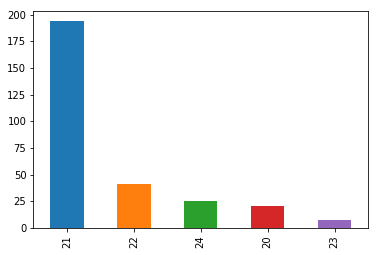

In [51]:
df_all.DicerCall.value_counts().plot('bar')

In [49]:
yeses = 0
for k, v in df_all.iterrows():
    total += 1
    ss = False
    if v.seqname == 'Un':
        continue
    df_ann_c = df_anns[v.seqname]
    df_ann_c_overlaps = df_ann_c[(df_ann_c.end >= v.start) & (df_ann_c.start <= v.end)]
    if len(df_ann_c_overlaps.index) > 0:
        yeses += 1
perc_mite = yeses * 100 / total_mirna
perc_mite

5.536332179930795